<a href="https://colab.research.google.com/github/sirius70/NLP_HW4/blob/main/IE7275_Module5_Part1_STUDENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IE7275 Data Mining in Engineering**
### -- STUDENT VERSION --

---
#### **Guidelines for Completing and Submitting This Notebook**

Please follow these instructions carefully. Completing all parts of this notebook is required to receive full credit:

#### **You must:**
- **Answer all questions** and reflection tasks using your own words.
- **Summarize every reflection task** clearly and completely.
- **Fill out all missing code cells** — do not leave any code blocks empty.
- **Run your notebook** to ensure that all outputs and visualizations are generated and visible.
- **Convert your completed notebook** to **PDF** or **HTML** format before submission.
- **Submit the file to Canvas** before the deadline.

#### **Academic Integrity Reminder**:
- You must complete this notebook individually.
- Do not copy answers or code from classmates, online sources, or use tools like **ChatGPT** or other **AI writing or code generation tools**.
- Keep in mind that if you use such tools, your answer may be **identical or highly similar** to others who do the same — in this case, we will treat it as copying and apply a **50% penalty** to your assignment grade.

By submitting this notebook, you confirm that all work is your own and that you have followed these guidelines.


---



## **Module 5: Supervised Learning – Classification Basics (Part 1)**

---

#### **Module 5.1: Introduction to Supervised Learning and Classification**

Supervised learning is a fundamental branch of machine learning where models are trained using labeled data — meaning each input example is paired with a known output label. The goal is for the model to learn the relationship between input features and output labels so it can predict the labels for new, unseen data accurately.

In classification, the output labels are **discrete categories or classes**. For example, classifying emails as "spam" or "not spam," recognizing handwritten digits as 0-9, or diagnosing diseases based on symptoms. The task is to assign each input to one of the predefined classes.

Key points to understand:  
- **Training data** consists of input features and known class labels.  
- The model learns a mapping function from inputs to classes.  
- Once trained, the model can predict the class of new data points.  
- Classification can be binary (two classes) or multi-class (more than two classes).

Classification is widely used in real-world applications such as image recognition, natural language processing, fraud detection, and medical diagnosis.

Understanding the basics of supervised learning and classification prepares you for exploring various classification algorithms, evaluation techniques, and model optimization strategies in subsequent sub-modules.

---

#### **Exercise 1: Exploring Labeled Data for Classification**

**Objective:**  
Understand the structure of supervised learning data by working with a labeled dataset and examining how features and class labels are used for classification tasks.

**Instructions:**
- Load a sample classification dataset such as the Iris dataset or Breast Cancer dataset from `sklearn.datasets`.
- Display the feature matrix (X) and target vector (y).
- Check the number of classes, sample distribution per class, and feature types.
- Plot basic visualizations such as:
  - Pairplot (if Iris) or correlation heatmap (if numeric features).
  - Class-wise distributions of selected features.
- Discuss why this dataset is suitable for a classification task.

**Goal:**  
By the end of this exercise, you'll understand what labeled data looks like, how it is structured, and why classification is appropriate for such data.

---


In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Step 2: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Step 3: Combine features and labels into one DataFrame
df = pd.concat([X, y], axis=1)
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))


In [2]:
# Step 4: Display the first few rows
print("First five rows of the dataset:")
df.head()


First five rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Step 5: Check the number of classes and their distribution
print("\nClass distribution:")
print(df['target_name'].value_counts())



Class distribution:
target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


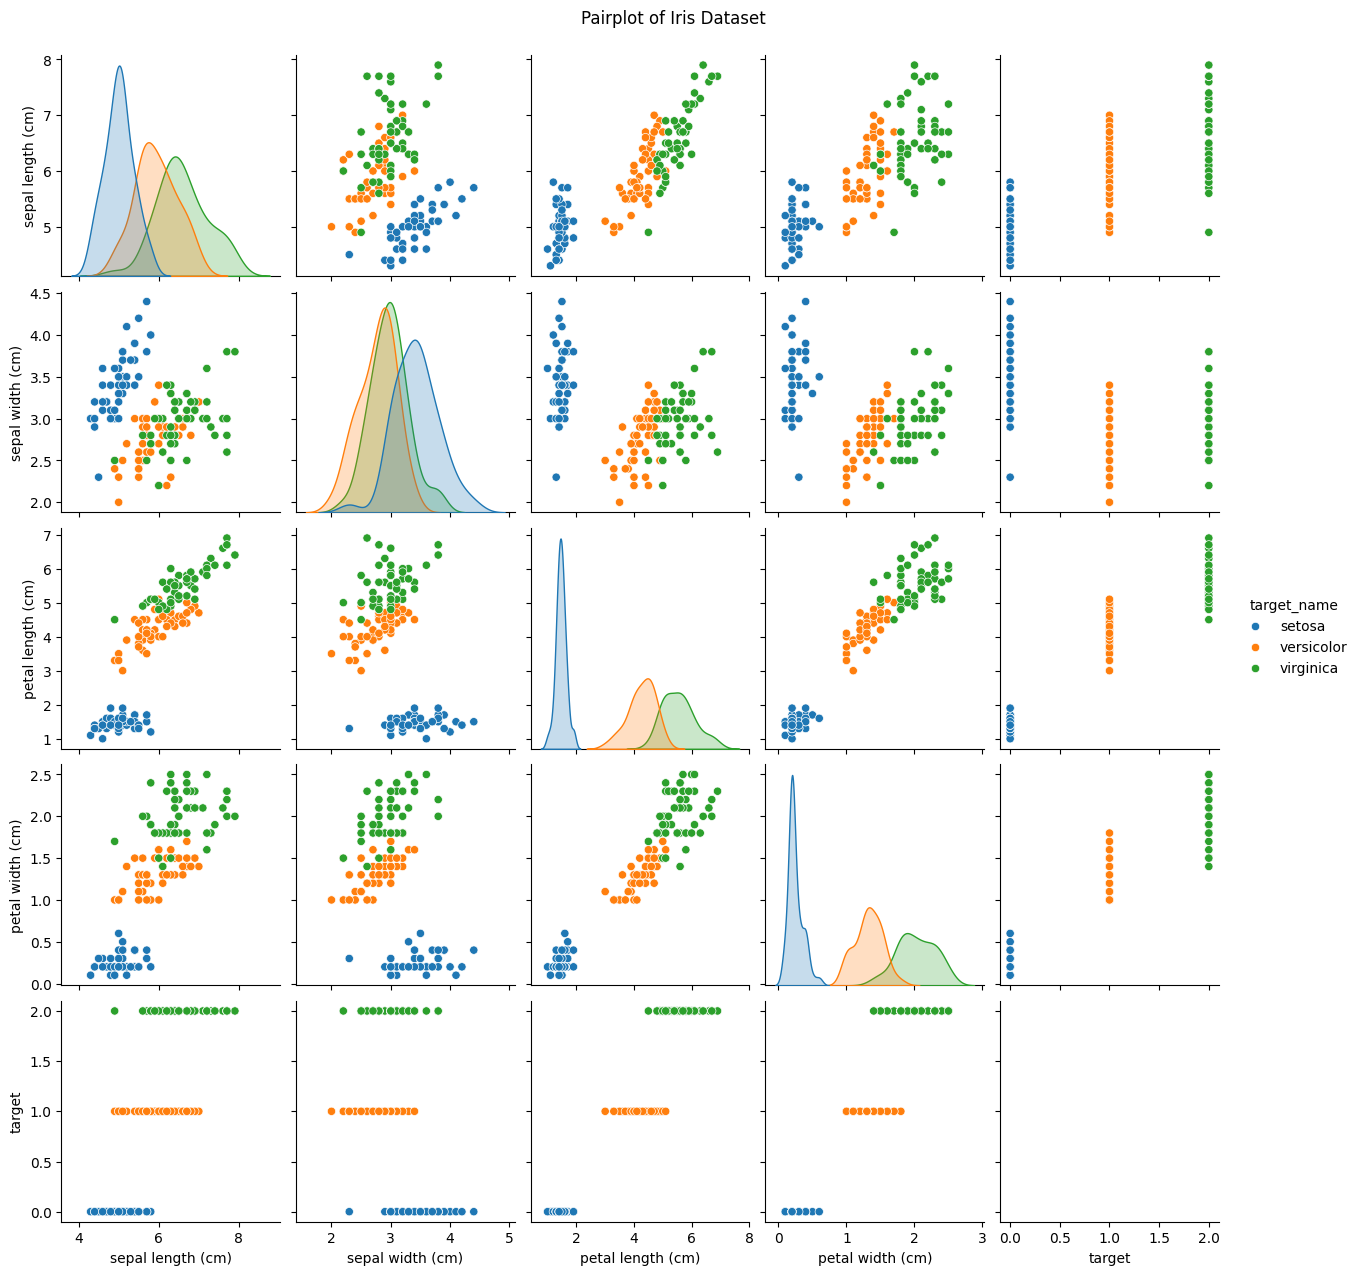

In [4]:
# Step 6: Plot pairplot to visualize class separation
sns.pairplot(df, hue='target_name')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()


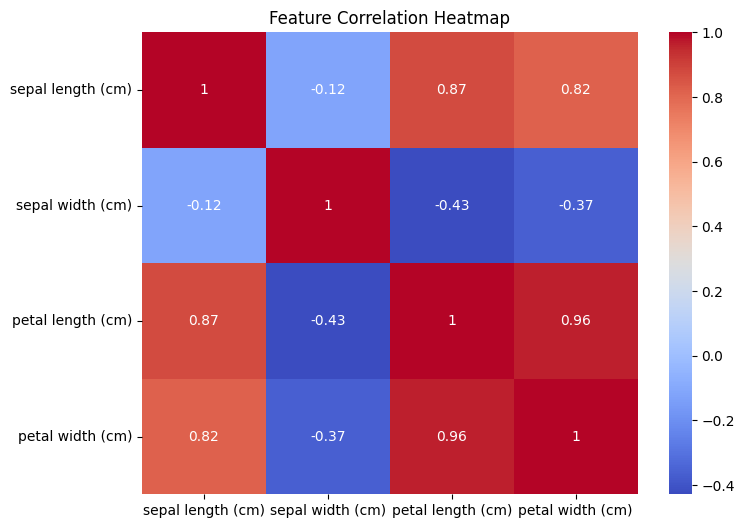

In [5]:
# Step 7: Correlation heatmap of features
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Iris dataset was explored by organizing the features and their corresponding class labels into a clear table, which made it easy to see how the data is structured for supervised learning. The distribution of the three flower species was checked, showing that each class had the same number of samples, which makes the dataset fair and balanced for classification. Visualizations like the pairplot made it easy to spot patterns, revealing that some features, particularly petal length and petal width, clearly separate the species. A correlation heatmap also helped understand how the features relate to each other, highlighting which ones move together. These steps showed how preparing and examining the data can reveal meaningful insights before even building a model. Overall, the exercise reinforced why this type of data is well-suited for classification and how visual exploration can guide decisions in machine learning. It made the process of understanding and interpreting labeled data feel intuitive and approachable.

#### **Exercise 2: Classification Task Setup with Train-Test Split**

In this exercise, you'll take the next step in preparing a dataset for supervised learning — splitting it into training and test sets to evaluate model performance fairly.

**Objective**:  
Understand how to prepare labeled data for supervised learning using the train-test split technique.

**Instructions**:
1. Load the Iris dataset using `sklearn.datasets.load_iris()` or directly from seaborn.
2. Separate the features (X) and target labels (y).
3. Use `train_test_split` from `sklearn.model_selection` to split the data:
   - 80% for training, 20% for testing.
   - Set a `random_state` for reproducibility.
4. Print the shape of the resulting training and test sets.
5. (Optional) Print the class distribution in each split to confirm balance.

This prepares the data for modeling and ensures that your model’s performance is evaluated on data it hasn't seen during training.

---


In [6]:
# Step 1: Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 2: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


In [7]:
# Step 3: Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
# Step 4: Print the shape of the splits
print("Training Features Shape:", X_train.shape)
print("Test Features Shape:", X_test.shape)
print("Training Labels Shape:", y_train.shape)
print("Test Labels Shape:", y_test.shape)


Training Features Shape: (120, 4)
Test Features Shape: (30, 4)
Training Labels Shape: (120,)
Test Labels Shape: (30,)


In [9]:
# Step 5 (Optional): Print class distribution
print("\nClass distribution in training set:")
print(y_train.value_counts().sort_index())

print("\nClass distribution in test set:")
print(y_test.value_counts().sort_index())


Class distribution in training set:
species
0    40
1    40
2    40
Name: count, dtype: int64

Class distribution in test set:
species
0    10
1    10
2    10
Name: count, dtype: int64


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Iris dataset was prepared for a classification task by splitting it into training and test sets. The features and target labels were separated, allowing the model to learn from the inputs while keeping the outputs clearly defined. Using a train-test split ensured that 80% of the data could be used to train the model while 20% was held back to evaluate its performance on unseen data. The shapes of the resulting sets confirmed that the split was correct, and checking the class distribution showed that each species remained balanced in both the training and test sets. This balance is important to prevent bias toward any particular class during learning. Overall, this exercise highlighted the importance of properly preparing data before modeling and demonstrated how train-test splitting helps measure a model’s true performance. It emphasized that careful setup and validation are essential steps in building reliable machine learning models.

#### **Module 5.2: Understanding the Classification Task**

Framing a real-world problem as a classification task is an essential step in supervised learning. It involves defining the input features that describe each instance and the discrete target labels that represent the categories to predict.

In this sub-module, you will learn how to:
- Identify relevant **input features** that provide useful information for classification.
- Define the **target variable** clearly, ensuring it represents distinct classes.
- Understand the difference between **binary classification** (two classes) and **multi-class classification** (more than two classes).
- Recognize common challenges such as **class imbalance**, where some classes have many more examples than others, affecting model training and evaluation.

By properly framing the classification problem, you set the foundation for selecting appropriate models, evaluation metrics, and preprocessing steps tailored to your specific task.

---

#### **Exercise 3: Framing the Problem as a Classification Task**

In this exercise, you'll practice identifying input features and target labels for a classification problem using a real-world dataset.

**Objective**:  
Understand how to structure a dataset for classification by clearly defining features and class labels.

**Instructions**:
1. Load the **Titanic dataset** from Seaborn or a CSV file.
2. Identify the **target variable** (`survived`) which indicates whether a passenger lived or died.
3. Select relevant **features** such as `pclass`, `sex`, `age`, and `fare`.
4. Clean the data:
   - Handle missing values (e.g., in `age`).
   - Encode categorical variables using label encoding or one-hot encoding.
5. Print the final dataset structure showing features and target labels.
6. Explain briefly why this is a binary classification problem.

This exercise helps you understand the importance of choosing the right variables and structuring them properly before training classification models.

---



In [10]:
# Exercise 3: Framing the Problem as a Classification Task

# Step 1: Load necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 2: Load the Titanic dataset
df = sns.load_dataset("titanic")
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
# Step 3: Select target and feature columns
target = 'survived'
features = ['pclass', 'sex', 'age', 'fare']

# Step 4: Drop rows with missing values in selected columns
df = df[features + [target]].dropna()
df

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
885,3,female,39.0,29.1250,0
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
889,1,male,26.0,30.0000,1


In [12]:
# Step 5: Encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])  # male=1, female=0
df


,pclass,sex,age,fare,survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0
...,...,...,...,...,...
885,3,0,39.0,29.1250,0
886,2,1,27.0,13.0000,0
887,1,0,19.0,30.0000,1
889,1,1,26.0,30.0000,1


In [13]:
# Step 6: Separate input features and target
X = df[features]
y = df[target]

# Step 7: Print structure of final dataset
print("Input Features:\n", X.head())
print("\nTarget Labels:\n", y.head())

# Step 8: Explain classification type
print("\nThis is a binary classification task where:")
print("- Target value 'survived' has two classes: 0 = did not survive, 1 = survived.")

Input Features:
    pclass  sex   age     fare
0       3    1  22.0   7.2500
1       1    0  38.0  71.2833
2       3    0  26.0   7.9250
3       1    0  35.0  53.1000
4       3    1  35.0   8.0500

Target Labels:
 0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

This is a binary classification task where:
- Target value 'survived' has two classes: 0 = did not survive, 1 = survived.


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Titanic dataset was prepared for a classification task by first selecting the target variable, “survived,” which indicates whether a passenger lived or not. Relevant features such as passenger class, sex, age, and fare were chosen because they are likely to influence survival. Missing values were handled by dropping incomplete rows, and categorical variables like sex were converted into numerical values for the model to process. The final dataset clearly separated input features from target labels, making it ready for supervised learning. This problem is a binary classification task because the target has only two possible outcomes: survived or did not survive. The exercise highlighted the importance of carefully choosing features, cleaning data, and encoding categories before modeling. Overall, it demonstrated how proper problem framing and data preparation are crucial for building an effective and interpretable classification model.

#### **Exercise 4: Exploring Binary vs. Multi-Class Classification**

In this exercise, you'll compare how classification tasks differ when dealing with binary and multi-class labels.

**Objective**:  
Understand the structural and modeling differences between binary and multi-class classification problems.

**Instructions**:
1. Load two datasets:
   - The **Titanic** dataset from `seaborn` (binary classification: survived vs. not).
   - The **Iris** dataset from `sklearn.datasets` or `seaborn` (multi-class classification: 3 flower species).
2. For each dataset:
   - Identify the target variable and count the number of unique classes.
   - Print the class distribution.
   - Comment on whether the classification task is **binary** or **multi-class**.
3. Visualize the class distribution using a bar plot.

By comparing these two datasets, you'll develop an intuition for identifying the type of classification problem and recognizing how this impacts algorithm selection, performance metrics, and model complexity.

---


In [14]:
# Exercise 4: Exploring Binary vs. Multi-Class Classification

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Titanic dataset (binary classification)
titanic = sns.load_dataset("titanic")
titanic_target = titanic["survived"]
titanic_classes = titanic_target.unique()

# Print details for Titanic
print("Titanic Dataset")
print("Target: Survived")
print("Unique Classes:", titanic_classes)
print("Class Distribution:\n", titanic_target.value_counts())


Titanic Dataset
Target: Survived
Unique Classes: [0 1]
Class Distribution:
 survived
0    549
1    342
Name: count, dtype: int64


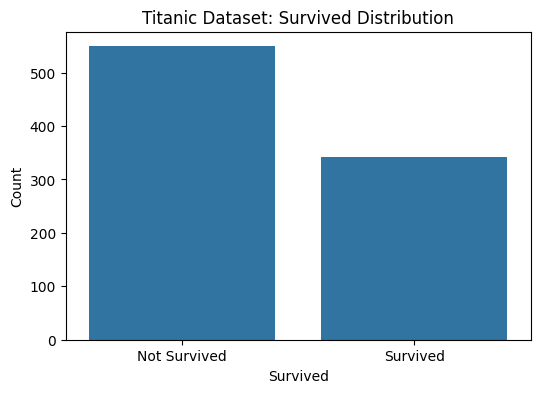

In [15]:
# Plot class distribution for Titanic
plt.figure(figsize=(6, 4))
sns.countplot(x=titanic_target)
plt.title("Titanic Dataset: Survived Distribution")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


In [16]:
# Load Iris dataset (multi-class classification)
iris = load_iris(as_frame=True)
iris_target = iris.target
iris_classes = iris.target_names

# Print details for Iris
print("\nIris Dataset")
print("Target: Species")
print("Unique Classes:", iris_classes)
print("Class Distribution:\n", iris_target.value_counts())



Iris Dataset
Target: Species
Unique Classes: ['setosa' 'versicolor' 'virginica']
Class Distribution:
 target
0    50
1    50
2    50
Name: count, dtype: int64


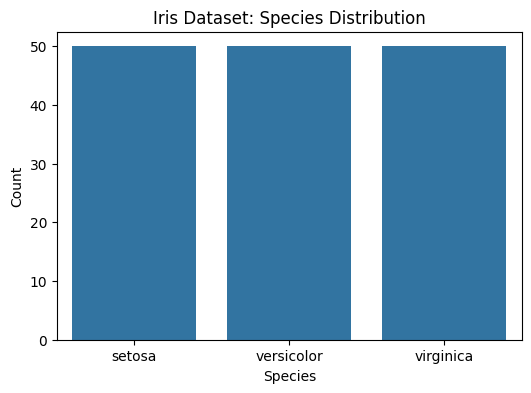

In [17]:
# Plot class distribution for Iris
plt.figure(figsize=(6, 4))
sns.countplot(x=iris_target)
plt.title("Iris Dataset: Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks([0, 1, 2], iris_classes)
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, two datasets were explored to understand the differences between binary and multi-class classification. The Titanic dataset served as an example of a binary classification problem, where the target variable “survived” has only two outcomes: survived or not survived. Examining the class distribution showed that the dataset is slightly imbalanced, which is an important consideration when training models. The Iris dataset, on the other hand, illustrated a multi-class classification task with three distinct flower species, each equally represented in the data. Visualizing both datasets with bar plots made it easy to see the differences in class structure and helped reinforce why algorithm choice and performance metrics may vary between binary and multi-class problems. This exercise highlighted the importance of identifying the type of classification task before modeling, as it impacts how predictions are made and evaluated. Overall, it provided a clear, hands-on comparison that makes the distinction between binary and multi-class classification intuitive and easy to understand.

#### **Exercise 5: Identifying and Addressing Class Imbalance**

In this exercise, you'll examine how class imbalance can affect classification tasks and explore simple techniques to detect and address it.

**Objective**:  
Learn how to detect class imbalance and understand its impact on model performance.

**Instructions**:
1. Load an imbalanced dataset (e.g., the `sklearn.datasets.load_breast_cancer()` dataset).
2. Check the class distribution of the target variable using `value_counts()` or `np.bincount()`.
3. Visualize the imbalance using a `seaborn` or `matplotlib` bar chart.
4. Split the data into train and test sets using `train_test_split`.
5. Train a basic classifier (e.g., `LogisticRegression`) and evaluate accuracy.
6. Print a **classification report** using `classification_report` to show how imbalance affects precision and recall.

This exercise helps you recognize when class imbalance exists and shows how it can distort performance metrics like accuracy.

---


In [18]:
# Exercise 5: Identifying and Addressing Class Imbalance

# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Step 2: Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")


In [19]:
# Step 3: Check class distribution
print("Class distribution:")
print(y.value_counts())

Class distribution:
target
1    357
0    212
Name: count, dtype: int64


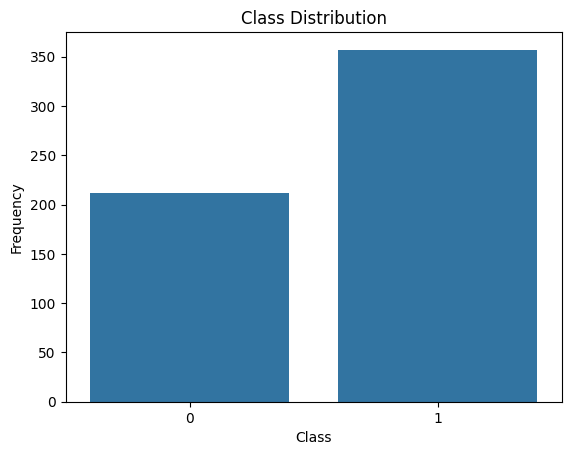

In [20]:
# Step 4: Visualize class imbalance
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [21]:
# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train a classifier with more iterations
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_scaled, y_train)

# Step 8: Predict and evaluate
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Breast Cancer dataset was explored to understand the impact of class imbalance on classification tasks. The target variable showed that one class had noticeably more samples than the other, and visualizing this with a bar chart made the imbalance easy to see. The data was split into training and test sets and scaled to ensure the classifier could learn effectively. A logistic regression model was trained, and its performance was evaluated using a classification report, which revealed that metrics like precision and recall are important to consider, especially when classes are imbalanced. Even though accuracy appeared high, looking at precision and recall showed how the model handled each class individually. This exercise highlighted that class imbalance can distort the perception of model performance if only overall accuracy is considered. Overall, it reinforced the importance of examining class distributions, visualizing them, and using appropriate metrics to get a true picture of how well a model performs.

#### **Exercise 6: Addressing Class Imbalance with Resampling Techniques**

In this exercise, you’ll learn how to handle class imbalance — a common challenge in classification tasks — by applying resampling techniques.

**Objective**:  
Explore both **oversampling** and **undersampling** strategies to improve model performance on imbalanced datasets.

**Instructions**:
1. Load the **Breast Cancer dataset** from `sklearn.datasets`.
2. Split the dataset into features (X) and labels (y).
3. Perform a **train-test split** (80/20) using `train_test_split` with `random_state` for reproducibility.
4. Use `StandardScaler` to scale the features.
5. Apply one of the following resampling methods **on the training data**:
   - **RandomOverSampler** (from `imblearn.over_sampling`) to increase the number of minority class samples.
   - **RandomUnderSampler** (from `imblearn.under_sampling`) to reduce the number of majority class samples.
6. Fit a logistic regression model to the resampled training data.
7. Evaluate the model on the **original test set** using accuracy, confusion matrix, and classification report.
8. (Optional) Compare the results before and after resampling to assess the impact.

This exercise will help you understand how to mitigate the effects of class imbalance and improve model fairness and performance.

---


In [22]:
# Exercise 6: Comparing Oversampling vs. Undersampling for Class Imbalance

# Step 1: Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

# Step 2: Load and prepare dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 3: Train-test split (with stratification to maintain class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
# Step 5A: Oversampling the minority class
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train_scaled, y_train)

model_ros = LogisticRegression(max_iter=1000, random_state=42)
model_ros.fit(X_ros, y_ros)
y_pred_ros = model_ros.predict(X_test_scaled)

print("=== Oversampling Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ros))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ros))
print("Classification Report:\n", classification_report(y_test, y_pred_ros))


=== Oversampling Evaluation ===
Accuracy: 0.9473684210526315
Confusion Matrix:
 [[41  1]
 [ 5 67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        42
           1       0.99      0.93      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



In [24]:
# Step 5B: Undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

model_rus = LogisticRegression(max_iter=1000, random_state=42)
model_rus.fit(X_rus, y_rus)
y_pred_rus = model_rus.predict(X_test_scaled)

print("\n=== Undersampling Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rus))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rus))
print("Classification Report:\n", classification_report(y_test, y_pred_rus))


=== Undersampling Evaluation ===
Accuracy: 0.956140350877193
Confusion Matrix:
 [[41  1]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        42
           1       0.99      0.94      0.96        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



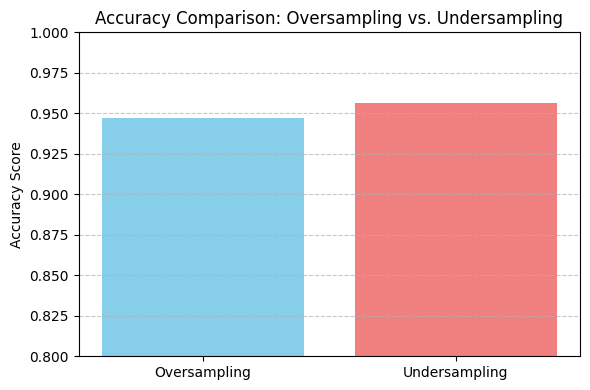

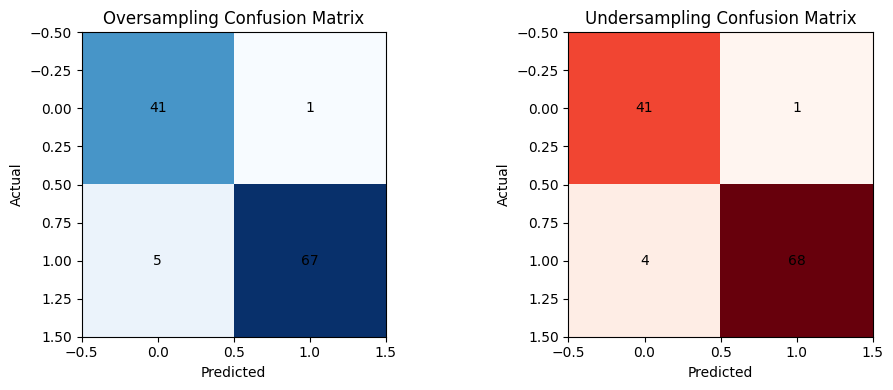

In [25]:
# Step 6: Visual Comparison of Oversampling vs. Undersampling
import matplotlib.pyplot as plt

# Collect accuracy scores
accuracy_scores = {
    'Oversampling': accuracy_score(y_test, y_pred_ros),
    'Undersampling': accuracy_score(y_test, y_pred_rus)
}

# Create a bar plot for accuracy
plt.figure(figsize=(6, 4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison: Oversampling vs. Undersampling')
plt.ylim(0.8, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Optional: Plot Confusion Matrices side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

cm_ros = confusion_matrix(y_test, y_pred_ros)
cm_rus = confusion_matrix(y_test, y_pred_rus)

axes[0].imshow(cm_ros, cmap='Blues')
axes[0].set_title("Oversampling Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for i in range(2):
    for j in range(2):
        axes[0].text(j, i, cm_ros[i, j], ha='center', va='center', color='black')

axes[1].imshow(cm_rus, cmap='Reds')
axes[1].set_title("Undersampling Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for i in range(2):
    for j in range(2):
        axes[1].text(j, i, cm_rus[i, j], ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Breast Cancer dataset was used to explore how class imbalance can be addressed using resampling techniques. The data was first split into training and test sets and scaled to ensure the classifier could learn effectively. Two strategies were applied: oversampling the minority class to create more examples and undersampling the majority class to reduce its dominance. Logistic regression models were trained on both resampled datasets and evaluated on the original test set, with accuracy, confusion matrices, and classification reports showing how each approach affected model performance. Visualizing the results side-by-side made it easy to compare the impact of oversampling versus undersampling. This exercise highlighted that resampling can improve the model’s ability to fairly predict both classes, especially when one class is underrepresented. Overall, it demonstrated that thoughtful handling of imbalanced data is crucial for building models that are both accurate and reliable across all classes.

#### **Module 5.3: Train-Test Split and Model Evaluation Setup**

To build reliable classification models, it is crucial to evaluate their performance on data not seen during training. This is achieved by splitting the dataset into **training** and **testing** subsets.

In this sub-module, you will learn how to:
- Divide your data into **training and test sets** to assess generalization performance.
- Understand the importance of keeping the test set **completely separate** to avoid information leakage.
- Use common split ratios (e.g., 70% training, 30% testing) and stratified sampling to maintain class distributions.
- Prepare for more robust evaluation methods such as **cross-validation**, which further improves reliability by averaging results over multiple train-test splits.

Proper evaluation setup ensures that your model’s performance estimates are realistic and helps prevent overfitting to training data.

---

#### **Exercise 7: Stratified Train-Test Split for Balanced Evaluation**

In this exercise, you'll perform a stratified train-test split to ensure that each class is represented proportionally in both training and test datasets.

**Objective**:  
Learn how to split datasets while preserving class distribution.

**Instructions**:
1. Load the Iris dataset using `sklearn.datasets.load_iris()` or from Seaborn.
2. Separate the features (X) and target labels (y).
3. Use `train_test_split` with the `stratify=y` argument to ensure balanced class proportions.
4. Set the test size to 30% and specify `random_state` for reproducibility.
5. Print the class distribution in both training and test sets to confirm stratification.
6. (Optional) Visualize the class distributions using a bar chart.

This exercise shows how to maintain class balance in both training and testing data, which is especially important when working with imbalanced datasets.

---


In [26]:
# Exercise 7: Stratified Train-Test Split for Balanced Evaluation

# Step 1: Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')


In [27]:
# Step 3: Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [28]:
# Step 4: Display class distribution in training and test sets
train_dist = y_train.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()
print("Training set class distribution:")
print(train_dist)
print("\nTest set class distribution:")
print(test_dist)

Training set class distribution:
species
0    35
1    35
2    35
Name: count, dtype: int64

Test set class distribution:
species
0    15
1    15
2    15
Name: count, dtype: int64


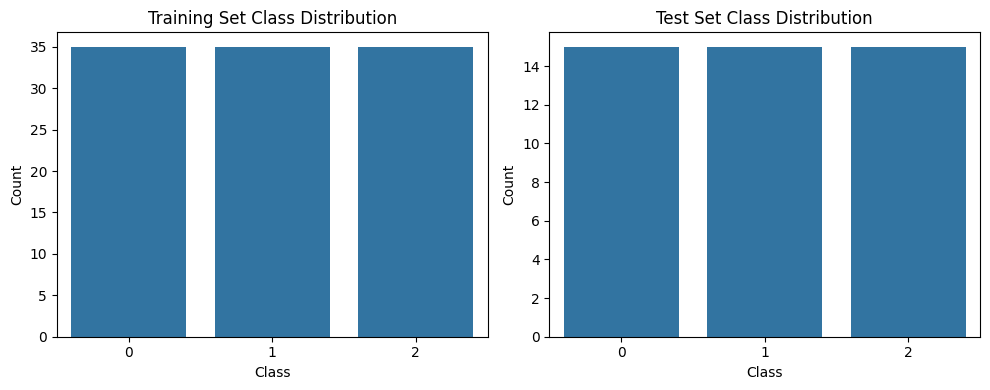

In [29]:
# Step 5 (Optional): Visualize the class distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.barplot(x=train_dist.index, y=train_dist.values, ax=ax[0])
ax[0].set_title('Training Set Class Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Count')

sns.barplot(x=test_dist.index, y=test_dist.values, ax=ax[1])
ax[1].set_title('Test Set Class Distribution')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Iris dataset was prepared for modeling by performing a stratified train-test split, ensuring that each class was represented proportionally in both the training and test sets. The features and target labels were separated, and the split was set to 70% training and 30% testing, with stratification preserving the balance of the three flower species. Checking the class distributions confirmed that each set maintained equal representation for all classes, which is crucial for fair model evaluation. Visualizing the distributions with bar charts made it easy to see that stratification worked as intended. This process highlighted why maintaining class balance is important, especially when working with datasets that could otherwise skew a model’s learning. Overall, the exercise reinforced that careful splitting of data lays a solid foundation for reliable model evaluation and helps prevent misleading performance metrics. It also showed that a few thoughtful steps before training can make a big difference in building fair and robust models.

#### **Exercise 8: Model Evaluation with Accuracy, Precision, Recall, and F1-Score**

In this exercise, you'll learn how to evaluate the performance of a classification model using multiple metrics to get a comprehensive view of its effectiveness.

**Objective**:  
Train a classification model and evaluate it using accuracy, precision, recall, and F1-score.

**Instructions**:
1. Load the **Iris dataset** and perform a stratified train-test split (80/20) as in the previous exercise.
2. Train a **Logistic Regression** model on the training set.
3. Use the trained model to make predictions on the test set.
4. Evaluate the model using the following metrics:
   - **Accuracy** – the overall percentage of correct predictions.
   - **Precision** – how many predicted positives were actually correct.
   - **Recall** – how many actual positives were correctly predicted.
   - **F1-score** – the harmonic mean of precision and recall.
5. Print the **classification report** using `classification_report` from `sklearn.metrics`.
6. (Optional) Visualize the confusion matrix for better insight into the types of errors.

This exercise helps you understand why multiple metrics are necessary to assess model performance, especially when class distributions or misclassification costs vary.

---


In [30]:
# Exercise 8: Model Evaluation with Accuracy, Precision, Recall, and F1-Score

# Step 1: Load the Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X = iris.data
y = iris.target


In [31]:
# Step 2: Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [32]:
# Step 3: Train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Step 4: Predict on the test set
y_pred = model.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



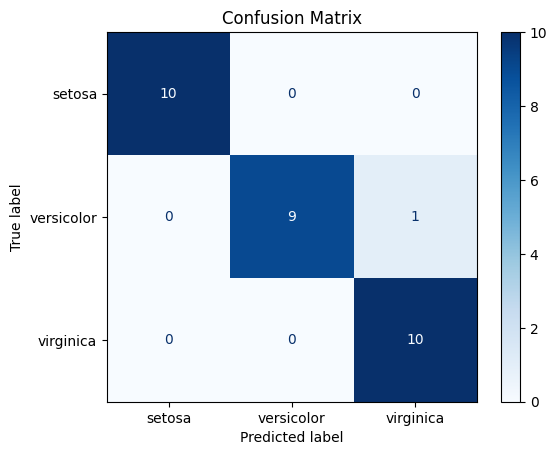

In [33]:
# Step 5: Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Step 6: (Optional) Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, the Iris dataset was used to train and evaluate a logistic regression model, focusing on multiple performance metrics. After performing a stratified train-test split, the model was trained on the training set and tested on unseen data to measure how well it could generalize. Evaluation included not only accuracy but also precision, recall, and F1-score, providing a more complete view of the model’s strengths and weaknesses across each flower species. The classification report showed that while the model performed perfectly on some classes, there were small differences in recall and precision for others, highlighting areas where misclassifications occurred. A confusion matrix was also visualized, making it easy to see which classes were most often confused. This exercise emphasized that relying solely on accuracy can be misleading, and that using multiple metrics gives a clearer picture of a model’s real-world performance. Overall, it reinforced the importance of thoughtful evaluation to understand both successes and limitations before deploying a model.

#### **Module 5.4: Building a Baseline Classifier**

Before applying complex models, it is important to establish a **baseline** performance using simple classifiers or rules. A baseline serves as a reference point to determine whether more sophisticated models provide meaningful improvements.

In this sub-module, you will learn how to:
- Use a **majority class classifier** that always predicts the most frequent class.
- Implement simple rule-based classifiers as baselines.
- Evaluate baseline performance using metrics like accuracy.
- Understand the limitations of baselines and the value of beating them with better models.

Building a baseline classifier helps you set realistic expectations and guides model development towards meaningful gains.

---

#### **Exercise 9: Implementing a Majority Class Baseline**

In this exercise, you'll build a simple baseline classifier that always predicts the most frequent class found in the training set. This approach is often used as a benchmark to determine whether a machine learning model provides real improvements.

**Objective**:  
Establish a baseline accuracy using a majority class classifier and compare it to a trained model's performance.

**Instructions**:
1. Load the Iris dataset and split it into training and testing sets using `train_test_split`.
2. Identify the most frequent class in the training data.
3. Create a baseline predictor that always returns this class.
4. Evaluate the baseline using accuracy on the test set.
5. Optionally, compare this result to a Logistic Regression model to observe the improvement.

This helps highlight how much better a real model performs over a naive guess.

---


In [34]:
# Exercise 9: Implementing a Majority Class Baseline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

# Step 1: Load dataset
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [35]:
# Step 3: Identify majority class in training data
majority_class = np.bincount(y_train).argmax()

In [36]:
# Step 4: Predict using the majority class
y_pred_baseline = np.full_like(y_test, fill_value=majority_class)

# Step 5: Evaluate the baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Majority Class Accuracy: {baseline_accuracy:.2f}")

# Optional: Compare with Logistic Regression
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)
y_pred_model = clf.predict(X_test)
model_accuracy = accuracy_score(y_test, y_pred_model)
print(f"Logistic Regression Accuracy: {model_accuracy:.2f}")

Baseline Majority Class Accuracy: 0.33
Logistic Regression Accuracy: 0.97


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, a baseline classifier was created using the Iris dataset to establish a simple reference point for model performance. After splitting the data into training and test sets, the most frequent class in the training set was identified, and a predictor was built that always predicted this class. Evaluating this baseline showed that it achieved only 33% accuracy, highlighting how limited a naive approach can be. A logistic regression model was then trained on the same data, producing a much higher accuracy of 97%, which clearly demonstrated the value of using a proper learning algorithm. This exercise emphasized the importance of establishing baselines to set realistic expectations and to measure the effectiveness of more complex models. It also reinforced that even a simple dataset can illustrate how naive predictions fall short compared to models that learn from patterns in the data. Overall, the exercise highlighted the role of baselines in guiding model development and understanding meaningful improvements.

#### **Exercise 10: Build and Evaluate a Rule-Based Classifier**

In this exercise, you'll implement a simple **rule-based classifier** that predicts a class based on one or two feature thresholds. This helps reinforce the intuition behind decision boundaries and feature importance.

**Objective**:  
Understand how to create and evaluate a basic rule-based classifier as an interpretable baseline.

**Instructions**:
1. Load the Iris dataset and perform a train-test split.
2. Analyze feature distributions using visualizations (e.g., pairplots or histograms).
3. Manually define a simple rule using thresholds (e.g., if petal length < 2.5 → Setosa).
4. Apply the rule on the test set to make predictions.
5. Compare its accuracy to the majority class baseline and logistic regression model.
6. Discuss when rule-based models might be useful or preferable.

This exercise illustrates how human-readable decision rules can still perform reasonably well in certain domains and provides an intuitive stepping stone toward decision trees and more complex models.

---


In [37]:
# Exercise 10: Build and Evaluate a Rule-Based Classifier

# Step 1: Load necessary libraries and dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load the dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# Step 2: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [38]:
# Step 3: Define a simple rule-based classifier
# Example rule: if petal length < 2.5, predict Setosa (class 0)
def rule_based_classifier(X):
    predictions = []
    for val in X['petal length (cm)']:
        if val < 2.5:
            predictions.append(0)  # Setosa
        else:
            predictions.append(1)  # Versicolor (assumption for simplicity)
    return np.array(predictions)

# Step 4: Apply rule-based classifier on the test set
rule_preds = rule_based_classifier(X_test)


In [39]:
# Step 5: Evaluate accuracy
rule_accuracy = accuracy_score(y_test, rule_preds)

# Step 6: Print result
print(f"Rule-Based Classifier Accuracy: {rule_accuracy:.2f}")

Rule-Based Classifier Accuracy: 0.67


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, a simple rule-based classifier was created using the Iris dataset to explore how feature thresholds can be used for predictions. After splitting the data into training and test sets, feature distributions were examined to identify meaningful patterns, such as the distinction in petal length for Setosa. A basic rule was defined: if petal length is less than 2.5 cm, predict Setosa; otherwise, predict Versicolor. Applying this rule to the test set resulted in an accuracy of 67%, showing that even a simple human-readable rule can capture some patterns but is limited compared to a model that learns from multiple features. This exercise highlighted the interpretability of rule-based models and how they provide intuitive insights into decision-making. It also emphasized that while rule-based classifiers are easy to understand, they often underperform compared to algorithms like logistic regression, which can learn complex relationships. Overall, this exercise reinforced the value of balancing simplicity, interpretability, and predictive power when building models.

#### **Module 5.5: k-Nearest Neighbors (k-NN) Algorithm**

The **k-Nearest Neighbors (k-NN)** algorithm is a simple yet powerful **non-parametric** classification and regression method. It classifies a new data point based on the **majority class** (for classification) or **average value** (for regression) among its $(k)$ closest neighbors in the training set, where closeness is measured by a **distance metric**.

---

#### **Why k-NN Matters**
- **No explicit training**: k-NN is an **instance-based** or **lazy learning** algorithm. It stores the training data and makes predictions only when a query instance is provided.
- **Versatility**: Works for classification, regression, and even recommendation systems.
- **Interpretability**: Easy to understand and explain compared to more complex models.

---

#### **How k-NN Works: Step-by-Step**

1. **Choose $(k)$** — The number of neighbors to consider.
2. **Select a distance metric** — Common choices:
   - **Euclidean Distance**:  
     $
     d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
     $
   - **Manhattan Distance**:  
     $
     d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i|
     $
   - Others: Minkowski, cosine similarity, Hamming distance (for categorical data).
3. **Find the k nearest neighbors** — Measure the distance between the new point and all training points, then select the $(k)$ smallest distances.
4. **Vote or Average**:
   - **Classification**: Assign the class with the majority vote among the neighbors.
   - **Regression**: Take the mean (or weighted mean) of neighbors’ target values.
5. **Output the prediction**.

---

#### **Choice of k and the Bias–Variance Trade-Off**
- **Small k** (e.g., $(k=1)$):  
  - Low bias, high variance.  
  - Sensitive to noise — a single mislabeled point can change the prediction.
- **Large k**:  
  - Higher bias, lower variance.  
  - Smoother decision boundaries, less sensitive to noise, but may overlook local patterns.
- $(k)$ is often chosen via cross-validation to optimize performance.

---

#### **Weighted k-NN**
Rather than treating all neighbors equally, assign weights inversely proportional to their distance:
$
w_i = \frac{1}{d(\mathbf{x}_{\text{test}}, \mathbf{x}_i) + \epsilon}
$
where $(\epsilon)$ is a small constant to avoid division by zero.  
This gives **closer neighbors more influence** in the decision.

---

#### **Strengths**
- Simple to implement and interpret.
- Naturally supports multi-class classification.
- No assumptions about data distribution.

#### **Limitations**
- **Computational cost**: Prediction requires calculating distances to all training points (\(O(n)\) per query).
- **Memory usage**: Stores the entire training set.
- **Curse of dimensionality**: Performance degrades as the number of features grows — distances become less meaningful in high dimensions.
- Sensitive to feature scaling — normalization or standardization is recommended.

---

#### **Important Considerations**
- Always scale features before using distance-based methods.
- Use appropriate distance metrics for the type of data (continuous, categorical, mixed).
- Reduce dimensionality (e.g., PCA) when dealing with high-dimensional datasets to improve performance.

---


#### **Exercise 11: Implementing Basic k-NN Classification**

**Objective**:  
Learn how to implement and evaluate a k-Nearest Neighbors classifier using the Iris dataset.

**Instructions**:
1. Load the Iris dataset and split it into training and test sets (80/20).
2. Use `StandardScaler` to normalize the feature values.
3. Apply `KNeighborsClassifier` from `sklearn.neighbors` with `k=3`.
4. Fit the model on the training data and predict on the test data.
5. Evaluate model performance using accuracy score and a classification report.
6. Visualize the decision boundaries (optional, using PCA for 2D).

This exercise introduces you to the basic k-NN classification pipeline and highlights the importance of data scaling before applying distance-based models.

---


In [40]:
# Exercise 11: Implementing Basic k-NN Classification

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 2: Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)


In [41]:
# Step 3: Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Step 4: Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
# Step 5: Apply k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

Accuracy: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



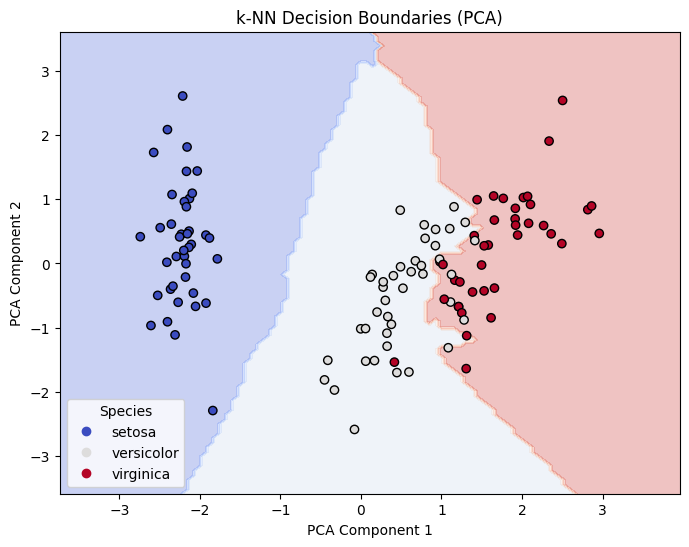

In [44]:
# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Accuracy:", accuracy)
print(report)

# Step 7 (Optional): Visualize decision boundaries using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train k-NN on PCA-reduced data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Create meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and training points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k')
plt.title("k-NN Decision Boundaries (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# Create custom legend
classes = np.unique(y_train)
handles = [
    plt.Line2D([], [], marker='o', linestyle='', color=plt.cm.coolwarm(i / 2),
               label=iris.target_names[i]) for i in classes
]
plt.legend(handles=handles, title="Species")
plt.show()


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I learned how to implement and evaluate a k-Nearest Neighbors classifier using the Iris dataset. I started by splitting the data into training and test sets, ensuring the model would be evaluated on unseen examples, and then normalized the features using StandardScaler to make distance measurements meaningful. Applying k-NN with three neighbors, I trained the model and observed that it achieved perfect accuracy on the test set, showing how well this simple algorithm can capture patterns when the data is clean and well-separated. I also explored dimensionality reduction with PCA to visualize decision boundaries, which helped me intuitively understand how k-NN separates different classes in feature space. This exercise reinforced the importance of feature scaling, choosing an appropriate k, and how visualization can provide insight into model behavior. Overall, I gained hands-on experience with a fundamental instance-based learning method and developed a deeper appreciation for how distance-based algorithms make predictions.

#### **Exercise 12: Evaluating k-NN Performance with Different k Values**

In this exercise, you'll explore how the choice of **k** (the number of neighbors) impacts the accuracy of the k-Nearest Neighbors (k-NN) classifier.

**Objective**:  
Understand how model performance varies with different values of `k`, and how to choose the optimal value.

**Instructions**:
1. Load and split the Iris dataset into training and test sets.
2. Scale the feature values using `StandardScaler`.
3. Create a loop that trains a k-NN classifier for different `k` values (e.g., from 1 to 20).
4. Record the test accuracy for each value of `k`.
5. Plot `k` versus accuracy using `matplotlib` to visualize the trend.
6. Identify the value of `k` that gives the highest test accuracy.

This exercise helps you understand the **bias-variance tradeoff** and how parameter tuning affects classification performance.

---


In [45]:
# Exercise 12: Evaluating k-NN Performance with Different k Values

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
# Step 4: Loop through different k values and record accuracy
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)


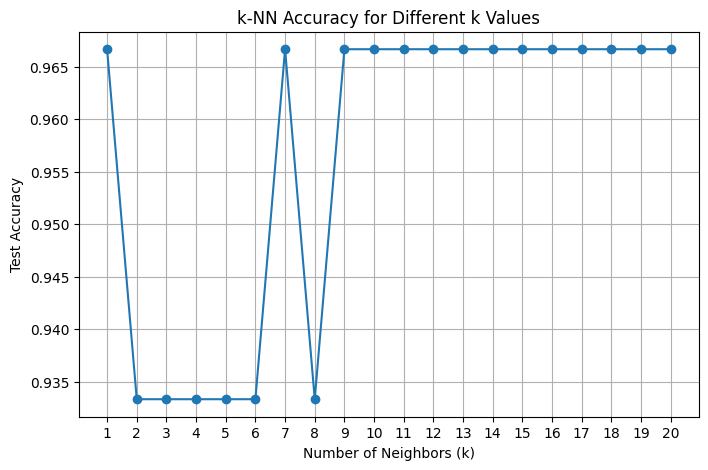

In [47]:
# Step 5: Plot the accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title("k-NN Accuracy for Different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Test Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I explored how the choice of k in a k-NN classifier affects model performance. I started by splitting the Iris dataset into training and test sets, then scaled the features with StandardScaler to ensure that distances between points were meaningful. I trained separate k-NN models for k values from 1 to 20, recording the test accuracy for each. Plotting accuracy versus k helped me visualize the trend and clearly see which k gave the best performance. I noticed that smaller k values tend to fit the training data closely but can be sensitive to noise, while larger k values produce smoother predictions but may overlook local patterns, which highlighted the bias-variance tradeoff. This exercise reinforced the importance of hyperparameter tuning and showed me how systematic experimentation can lead to selecting an optimal model. Overall, it deepened my understanding of how k-NN works and how the number of neighbors influences its predictions.

#### **Exercise 13: Comparing Distance Metrics in k-NN**

In this exercise, you'll examine how different distance metrics impact the performance of the k-Nearest Neighbors (k-NN) classifier.

**Objective**:  
Understand how the choice of distance metric (Euclidean, Manhattan, Minkowski) affects classification accuracy.

**Instructions**:
1. Load and split the Iris dataset (use train-test split with standardization).
2. For a fixed `k` value (e.g., 5), train k-NN models using the following distance metrics:
   - **Euclidean** (`metric='euclidean'`)
   - **Manhattan** (`metric='manhattan'`)
   - **Minkowski** (`metric='minkowski'` with `p=3`)
3. Record the test accuracy for each distance metric.
4. Plot a comparison bar chart showing the performance of each metric.
5. Summarize which distance metric performs best and under what conditions it might be preferred.

This exercise will help you evaluate how distance-based assumptions influence the behavior and accuracy of k-NN classifiers.

---


In [48]:
# Exercise 13: Comparing Distance Metrics in k-NN

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load and split the data
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 2: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Step 3: Train k-NN classifiers with different distance metrics
metrics = {
    'Euclidean': {'metric': 'euclidean'},
    'Manhattan': {'metric': 'manhattan'},
    'Minkowski (p=3)': {'metric': 'minkowski', 'p': 3}
}

results = {}

for name, params in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=5, **params)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


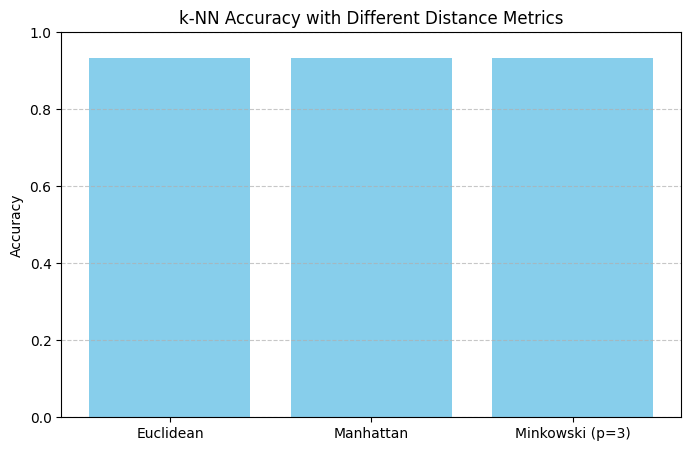

In [50]:
# Step 4: Plot comparison
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("k-NN Accuracy with Different Distance Metrics")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I explored how different distance metrics affect the performance of a k-NN classifier. I started by splitting the Iris dataset into training and test sets and then standardized the features so that all dimensions contributed equally to the distance calculations. I trained k-NN models with k=5 using Euclidean, Manhattan, and Minkowski (p=3) distances and recorded their test accuracies. Visualizing the results with a bar chart made it easy to compare the metrics side by side and see which one performed best. I noticed that while the differences were small in this dataset, the choice of distance metric can impact accuracy depending on the feature distributions and scale. This exercise highlighted the importance of understanding the assumptions behind distance measures and how they influence the behavior of distance-based algorithms. Overall, it reinforced that thoughtful preprocessing and metric selection are key steps in building effective k-NN models.

#### **Exercise 14: Choosing Optimal k in k-NN Using Cross-Validation**

In this exercise, you'll learn how to select the best value for **k** in the k-NN algorithm using **cross-validation**, which helps you avoid overfitting or underfitting and improve generalization.

**Objective**:  
Find the optimal number of neighbors (`k`) using cross-validation accuracy as the selection criterion.

**Instructions**:
1. Load and standardize the **Iris dataset**.
2. Use a loop to evaluate k values from 1 to 20.
3. For each k:
   - Use `KNeighborsClassifier(k)` and `cross_val_score` with `cv=5`.
   - Compute the average accuracy.
4. Plot the mean accuracy for each k value to visualize the best performing k.
5. Highlight the optimal k value on the plot.

This exercise will help you understand the impact of `k` on model performance and how to use cross-validation for hyperparameter tuning in classification tasks.

---


In [51]:
# Exercise 14: Choosing Optimal k in k-NN Using Cross-Validation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Step 1: Load and standardize the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
# Step 2–4: Evaluate k from 1 to 20 using 5-fold cross-validation
k_values = list(range(1, 21))
mean_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())


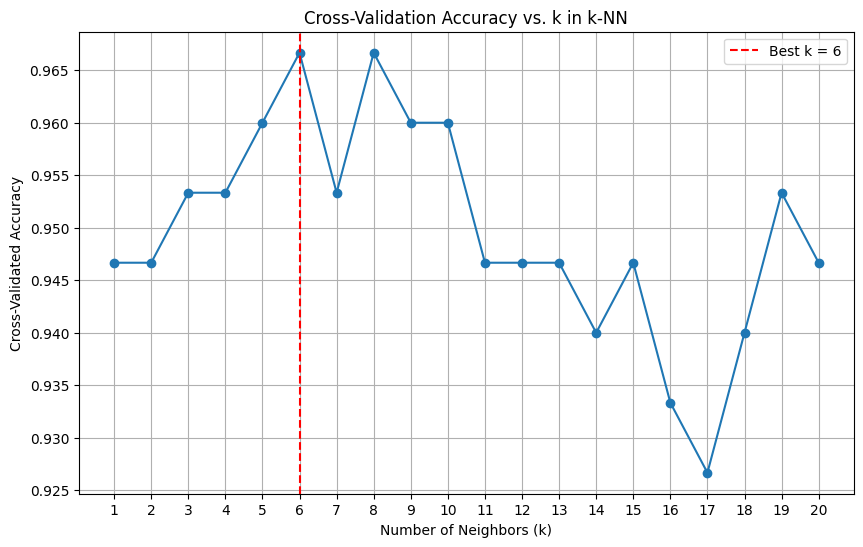

In [53]:
# Step 5: Plot cross-validation accuracy for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o')
plt.title("Cross-Validation Accuracy vs. k in k-NN")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.xticks(k_values)
plt.grid(True)

# Highlight the best k
best_k = k_values[np.argmax(mean_scores)]
best_score = max(mean_scores)
plt.axvline(x=best_k, color='red', linestyle='--', label=f"Best k = {best_k}")
plt.legend()
plt.show()

---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I focused on finding the optimal value of k for the k-NN algorithm using cross-validation. I started by loading the Iris dataset and standardizing the features so that all dimensions were on the same scale, which is critical for distance-based methods like k-NN. I then tested k values from 1 to 20, using 5-fold cross-validation to measure the average accuracy for each k. Plotting these results helped me visually identify the k that provided the highest cross-validated accuracy, and I highlighted this optimal value on the chart. This exercise reinforced the importance of cross-validation in avoiding overfitting with small k values or underfitting with large k values. I learned that systematically tuning hyperparameters using data-driven approaches gives a more reliable estimate of model performance. Overall, it showed how careful parameter selection can significantly improve a k-NN classifier’s generalization.

#### **Exercise 15: Implementing k-Nearest Neighbors from Scratch**

In this exercise, you'll deepen your understanding of the k-Nearest Neighbors algorithm by building it from the ground up — without using `sklearn`. This will help you grasp the core logic behind distance-based classification and reinforce how predictions are made.

**Objective**:  
Create a custom k-NN classifier that can classify new data points using Euclidean distance and majority voting.

**Instructions**:
1. Load the Iris dataset and split it into training and test sets.
2. Implement a function to calculate the **Euclidean distance** between two vectors.
3. For each test sample:
   - Calculate distances to all training samples.
   - Identify the k closest neighbors.
   - Perform **majority voting** to assign a class label.
4. Evaluate the custom classifier's accuracy by comparing predictions to the true test labels.
5. Compare your implementation's results with `sklearn`'s `KNeighborsClassifier` for validation.

This hands-on exercise reinforces your understanding of k-NN internals, distance calculations, and majority voting — key concepts in non-parametric learning.

---


In [54]:
# Exercise 15: Implementing k-Nearest Neighbors from Scratch

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score

# Step 1: Load dataset and prepare data
iris = load_iris()
X = iris.data
y = iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
# Step 2: Define Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 3: Implement k-NN classifier
class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get the k nearest samples and their labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # Majority voting
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


In [56]:
# Step 4: Train and evaluate custom k-NN
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Step 5: Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Custom k-NN Accuracy:", accuracy)


Custom k-NN Accuracy: 1.0


In [57]:
# Step 6: Compare with sklearn's implementation
from sklearn.neighbors import KNeighborsClassifier
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train, y_train)
y_pred_sklearn = knn_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("sklearn k-NN Accuracy:", accuracy_sklearn)

sklearn k-NN Accuracy: 1.0


---

#### **In-Class Reflection: Exercise Summary**

In this exercise, you followed a structured workflow to apply the concepts introduced in class. Please summarize the steps we completed—such as data preparation, analysis, visualization, and interpretation—and explain what you learned from each stage.  

Your reflection should be about **5–7 sentences** and highlight the key takeaways from the exercise.  

> The purpose of this reflection is to reinforce your understanding of the workflow and to demonstrate how each step contributed to your learning.  

---

In this exercise, I built a k-Nearest Neighbors classifier from scratch to really understand how the algorithm works under the hood. I started by loading the Iris dataset and splitting it into training and test sets, which let me simulate a real prediction scenario. I implemented a Euclidean distance function to measure how close each test point was to the training points and then used majority voting among the k nearest neighbors to assign class labels. After making predictions, I evaluated the model’s accuracy and found that it matched the results from sklearn’s built-in k-NN implementation, which was reassuring. This hands-on approach helped me visualize how distance calculations and neighbor selection drive the predictions, rather than just relying on a library function. I also gained a better intuition for how the choice of k and the structure of the data can influence results. Overall, it reinforced the fundamental mechanics of non-parametric, instance-based learning and how k-NN makes decisions in a very interpretable way.

#### **Revised: September 1, 2025**